# Quickstart for option pricing model documentation

Welcome! Let's get you started with the basic process of documenting models with ValidMind.

You will learn how to initialize the ValidMind Developer Framework, develop a option pricing model, and then write custom tests that can be used for sensitivity and stress testing to quickly generate documentation about model.

<a id='toc0_'></a>

## Contents    
- [About ValidMind](#toc1_)    
  - [Before you begin](#toc1_1_)    
  - [New to ValidMind?](#toc1_2_)    
  - [Key concepts](#toc1_3_)    
- [Install the client library](#toc2_)
  - [Get your code snippet](#toc3_1_)
- [Initialize the client library](#toc3_)    
- [Initialize the Python environment](#toc4_)    
  - [Preview the documentation template](#toc4_1_)    
- [Data preparation](#toc5_)    
- [Model development](#toc6_)   
  - [Synthetic data generation](#toc6_1_)
  - [Model Calibration](#toc6_2_)    
- [Model Evaluation](#toc7_)    
  - [Benchmark Testing](#toc7_1_)    
  - [Sensitivity Testing](#toc7_2_)    
  - [Stress Testing](#toc7_3_)    
- [Next steps](#toc8_)    
  - [Work with your model documentation](#toc8_1_)    
  - [Discover more learning resources](#toc8_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

<a id='toc1_'></a>

## About ValidMind

ValidMind is a platform for managing model risk, including risk associated with AI and statistical models.

You use the ValidMind Developer Framework to automate documentation and validation tests, and then use the ValidMind AI Risk Platform UI to collaborate on model documentation. Together, these products simplify model risk management, facilitate compliance with regulations and institutional standards, and enhance collaboration between yourself and model validators.

<a id='toc1_1_'></a>

### Before you begin

This notebook assumes you have basic familiarity with Python, including an understanding of how functions work. If you are new to Python, you can still run the notebook but we recommend further familiarizing yourself with the language. 

If you encounter errors due to missing modules in your Python environment, install the modules with `pip install`, and then re-run the notebook. For more help, refer to [Installing Python Modules](https://docs.python.org/3/installing/index.html).

<a id='toc1_2_'></a>

### New to ValidMind?

If you haven't already seen our [Get started with the ValidMind Developer Framework](https://docs.validmind.ai/developer/get-started-developer-framework.html), we recommend you explore the available resources for developers at some point. There, you can learn more about documenting models, find code samples, or read our developer reference.

<div class="alert alert-block alert-info" style="background-color: #f7e4ee; color: black; border: 1px solid black;"><b>For access to all features available in this notebook, create a free ValidMind account.</b>
<br></br>
Signing up is FREE — <a href="https://docs.validmind.ai/guide/configuration/register-with-validmind.html"><b>Register with ValidMind</b></a></div>

<a id='toc1_3_'></a>

### Key concepts

**Model documentation**: A structured and detailed record pertaining to a model, encompassing key components such as its underlying assumptions, methodologies, data sources, inputs, performance metrics, evaluations, limitations, and intended uses. It serves to ensure transparency, adherence to regulatory requirements, and a clear understanding of potential risks associated with the model’s application.

**Documentation template**: Functions as a test suite and lays out the structure of model documentation, segmented into various sections and sub-sections. Documentation templates define the structure of your model documentation, specifying the tests that should be run, and how the results should be displayed.

**Tests**: A function contained in the ValidMind Developer Framework, designed to run a specific quantitative test on the dataset or model. Tests are the building blocks of ValidMind, used to evaluate and document models and datasets, and can be run individually or as part of a suite defined by your model documentation template.

**Custom tests**: Custom tests are functions that you define to evaluate your model or dataset. These functions can be registered with ValidMind to be used in the platform.

**Inputs**: Objects to be evaluated and documented in the ValidMind framework. They can be any of the following:

  - **model**: A single model that has been initialized in ValidMind with [`vm.init_model()`](https://docs.validmind.ai/validmind/validmind.html#init_model).
  - **dataset**: Single dataset that has been initialized in ValidMind with [`vm.init_dataset()`](https://docs.validmind.ai/validmind/validmind.html#init_dataset).
  - **models**: A list of ValidMind models - usually this is used when you want to compare multiple models in your custom test.
  - **datasets**: A list of ValidMind datasets - usually this is used when you want to compare multiple datasets in your custom test. See this [example](https://docs.validmind.ai/notebooks/how_to/run_tests_that_require_multiple_datasets.html) for more information.

**Parameters**: Additional arguments that can be passed when running a ValidMind test, used to pass additional information to a test, customize its behavior, or provide additional context.

**Outputs**: Custom tests can return elements like tables or plots. Tables may be a list of dictionaries (each representing a row) or a pandas DataFrame. Plots may be matplotlib or plotly figures.

**Test suites**: Collections of tests designed to run together to automate and generate model documentation end-to-end for specific use-cases.

Example: the [`classifier_full_suite`](https://docs.validmind.ai/validmind/validmind/test_suites/classifier.html#ClassifierFullSuite) test suite runs tests from the [`tabular_dataset`](https://docs.validmind.ai/validmind/validmind/test_suites/tabular_datasets.html) and [`classifier`](https://docs.validmind.ai/validmind/validmind/test_suites/classifier.html) test suites to fully document the data and model sections for binary classification model use-cases.


<a id='toc2_'></a>

## Install the client library

The client library provides Python support for the ValidMind Developer Framework. To install it:


In [1]:
%pip install -q validmind
import pandas as pd



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<a id='toc3_'></a>

## Initialize the client library

ValidMind generates a unique _code snippet_ for each registered model to connect with your developer environment. You initialize the client library with this code snippet, which ensures that your documentation and tests are uploaded to the correct model when you run the notebook.

<a id='toc3_1_'></a>

### Get your code snippet

1. In a browser, [log in to ValidMind](https://docs.validmind.ai/guide/configuration/log-in-to-validmind.html).

2. In the left sidebar, navigate to **Model Inventory** and click **+ Register new model**.

3. Enter the model details and click **Continue**. ([Need more help?](https://docs.validmind.ai/guide/model-inventory/register-models-in-inventory.html))

   For example, to register a model for use with this notebook, select:

   - Documentation template: `Capital markets`

   You can fill in other options according to your preference.

4. Go to **Getting Started** and click **Copy snippet to clipboard**.

Next, replace this placeholder with your own code snippet:


In [2]:
# Replace with your code snippet

import validmind as vm

vm.init(
    api_host="https://api.prod.validmind.ai/api/v1/tracking",
    api_key="...",
    api_secret="...",
    model="...",
)


2024-10-25 10:16:46,809 - INFO(validmind.api_client): 🎉 Connected to ValidMind!
📊 Model: [Anil] Option Pricing model (ID: cm21rglz400c08bpb83nla77a)
📁 Document Type: model_documentation


<a id='toc4_'></a>

## Initialize the Python environment

Next, let's import the necessary libraries and set up your Python environment for data analysis:


In [3]:
%matplotlib inline

<a id='toc4_1_'></a>

### Preview the documentation template

A template predefines sections for your model documentation and provides a general outline to follow, making the documentation process much easier.

You will upload documentation and test results into this template later on. For now, take a look at the structure that the template provides with the `vm.preview_template()` function from the ValidMind library and note the empty sections:


In [4]:
vm.preview_template()

2024-10-25 10:16:46,835 - ERROR(validmind.tests.load): Unable to load test my_custom_tests.SensitivityTest. No test provider found.
2024-10-25 10:16:46,837 - ERROR(validmind.tests.load): Unable to load test my_custom_tests.SensitivityTest. No test provider found.
2024-10-25 10:16:46,839 - ERROR(validmind.tests.load): Unable to load test my_custom_tests.SensitivityTest. No test provider found.
2024-10-25 10:16:46,840 - ERROR(validmind.tests.load): Unable to load test my_custom_tests.SensitivityTest. No test provider found.
2024-10-25 10:16:46,840 - ERROR(validmind.tests.load): Unable to load test my_custom_tests.SensitivityTest. No test provider found.
2024-10-25 10:16:46,841 - ERROR(validmind.tests.load): Unable to load test my_custom_tests.SensitivityTest. No test provider found.
2024-10-25 10:16:46,842 - ERROR(validmind.tests.load): Unable to load test my_custom_tests.SensitivityTest. No test provider found.


Accordion(children=(Accordion(children=(HTML(value='<p>Empty Section</p>'), Accordion(children=(HTML(value='<p…

<a id='toc5_'></a>
## Data Preparation

### Market Data Sources

### Market Data Quality and Availability

<a id='toc6_'></a>
## Model development

In [5]:
import numpy as np
from scipy.optimize import minimize

class OptionPricing:
    def __init__(self, S0, K, T, r):
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r

    def monte_carlo_simulation(self, N, M):
        raise NotImplementedError("Must be implemented by subclasses")

    def price_option(self, N, M):
        raise NotImplementedError("Must be implemented by subclasses")


In [6]:
import matplotlib.pyplot as plt
import numpy as np

class BlackScholesModel(OptionPricing):
    def __init__(self, S0, K, T, r, sigma):
        super().__init__(S0, K, T, r)
        self.sigma = sigma
    def monte_carlo_simulation(self, N, M):
        dt = self.T / M
        price_paths = np.zeros((N, M + 1))
        price_paths[:, 0] = self.S0
        for t in range(1, M + 1):
            Z = np.random.standard_normal(N)
            price_paths[:, t] = price_paths[:, t - 1] * np.exp((self.r - 0.5 * self.sigma**2) * dt + self.sigma * np.sqrt(dt) * Z)
        return price_paths

    def price_option(self, N, M):
        price_paths = self.monte_carlo_simulation(N, M)
        payoffs = np.maximum(price_paths[:, -1] - self.K, 0)
        return np.exp(-self.r * self.T) * np.mean(payoffs)
    
    def calibrate(self, market_prices, strikes, maturities):
        def objective_function(params):
            self.sigma = params[0]
            model_prices = [self.price_option(10000, 100) for K, T in zip(strikes, maturities)]
            return np.sum((np.array(market_prices) - np.array(model_prices))**2)
        
        result = minimize(objective_function, [self.sigma], bounds=[(0.01, 1.0)])
        self.sigma = result.x[0]

class StochasticVolatilityModel(OptionPricing):
    def __init__(self, S0, K, T, r, v0, kappa, theta, xi, rho):
        super().__init__(S0, K, T, r)
        self.v0 = v0
        self.kappa = kappa
        self.theta = theta
        self.xi = xi
        self.rho = rho
    def monte_carlo_simulation(self, N, M):
        dt = self.T / M
        price_paths = np.zeros((N, M + 1))
        vol_paths = np.zeros((N, M + 1))
        price_paths[:, 0] = self.S0
        vol_paths[:, 0] = self.v0
        for t in range(1, M + 1):
            Z1 = np.random.standard_normal(N)
            Z2 = np.random.standard_normal(N)
            W1 = Z1
            W2 = self.rho * Z1 + np.sqrt(1 - self.rho**2) * Z2
            vol_paths[:, t] = np.abs(vol_paths[:, t - 1] + self.kappa * (self.theta - vol_paths[:, t - 1]) * dt + self.xi * np.sqrt(vol_paths[:, t - 1] * dt) * W1)
            price_paths[:, t] = price_paths[:, t - 1] * np.exp((self.r - 0.5 * vol_paths[:, t - 1]) * dt + np.sqrt(vol_paths[:, t - 1] * dt) * W2)
        return price_paths

    def price_option(self, N, M):
        price_paths = self.monte_carlo_simulation(N, M)
        payoffs = np.maximum(price_paths[:, -1] - self.K, 0)
        return np.exp(-self.r * self.T) * np.mean(payoffs)
    
    def calibrate(self, market_prices, strikes, maturities):
        def objective_function(params):
            self.v0, self.kappa, self.theta, self.xi, self.rho = params
            model_prices = [self.price_option(10000, 100) for K, T in zip(strikes, maturities)]
            return np.sum((np.array(market_prices) - np.array(model_prices))**2)
        
        initial_guess = [self.v0, self.kappa, self.theta, self.xi, self.rho]
        bounds = [(0.01, 1.0), (0.01, 5.0), (0.01, 1.0), (0.01, 1.0), (-1.0, 1.0)]
        result = minimize(objective_function, initial_guess, bounds=bounds)
        self.v0, self.kappa, self.theta, self.xi, self.rho = result.x


class KnockoutOption:
    def __init__(self, model, S0, K, T, r, barrier):
        self.model = model
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r
        self.barrier = barrier

    def price_knockout_option(self, N, M):
        dt = self.T / M
        price_paths = np.zeros((N, M + 1))
        vol_paths = np.zeros((N, M + 1)) if isinstance(self.model, StochasticVolatilityModel) else None
        price_paths[:, 0] = self.S0
        if vol_paths is not None:
            vol_paths[:, 0] = self.model.v0
        
        for t in range(1, M + 1):
            Z1 = np.random.standard_normal(N)
            if vol_paths is None:
                # Black-Scholes Model
                price_paths[:, t] = price_paths[:, t - 1] * np.exp(
                    (self.r - 0.5 * self.model.sigma**2) * dt + self.model.sigma * np.sqrt(dt) * Z1
                )
            else:
                # Stochastic Volatility Model
                Z2 = np.random.standard_normal(N)
                W1 = Z1
                W2 = self.model.rho * Z1 + np.sqrt(1 - self.model.rho**2) * Z2
                vol_paths[:, t] = np.abs(vol_paths[:, t - 1] + self.model.kappa * (self.model.theta - vol_paths[:, t - 1]) * dt + self.model.xi * np.sqrt(vol_paths[:, t - 1] * dt) * W1)
                price_paths[:, t] = price_paths[:, t - 1] * np.exp(
                    (self.r - 0.5 * vol_paths[:, t - 1]) * dt + np.sqrt(vol_paths[:, t - 1] * dt) * W2
                )
            
            # Knockout condition
            price_paths[:, t][price_paths[:, t] >= self.barrier] = 0
        payoffs = np.maximum(price_paths[:, -1] - self.K, 0)
        return np.exp(-self.r * self.T) * np.mean(payoffs)

<a id='toc6_1'></a>
### Synthetic data generation

In [7]:
def generate_synthetic_market_data(model, strikes, maturities):
    market_prices = [model.price_option(10000, 100) for K, T in zip(strikes, maturities)]
    return market_prices

In [8]:
# Parameters for synthetic data
# Common
S0 = 100
K = 100
T = 1
r = 0.05
# BlackSholes
true_sigma = 0.2

# Stochastic Volatility
true_v0 = 0.2
true_kappa = 2.0
true_theta = 0.2
true_xi = 0.1
true_rho = -0.5

# Synthetic data generation parameters
strikes = [90, 95, 100, 105, 110]
maturities = [0.5, 1.0, 1.5, 2.0]

# Generate synthetic market data using the true parameters
bs_model = BlackScholesModel(S0, K, T, r, true_sigma)
bs_market_prices = generate_synthetic_market_data(bs_model, strikes, maturities)


sv_model = StochasticVolatilityModel(S0, K, T, r, true_v0, true_kappa, true_theta, true_xi, true_rho)
sv_market_prices = generate_synthetic_market_data(sv_model, strikes, maturities)


<a id='toc6_2'></a>
### Model Calibration

In [9]:
# Calibrate models
bs_model.calibrate(bs_market_prices, strikes, maturities)
print("Calibrated sigma:", bs_model.sigma)

sv_model.calibrate(sv_market_prices, strikes, maturities)
print("Calibrated parameters: v0 =", sv_model.v0, ", kappa =", sv_model.kappa, ", theta =", sv_model.theta, ", xi =", sv_model.xi, ", rho =", sv_model.rho)

Calibrated sigma: 0.19999999970173377
Calibrated parameters: v0 = 0.2000006180457111 , kappa = 2.0000021361873754 , theta = 0.20000057729100323 , xi = 0.10000065862011685 , rho = -0.49999891074819885


<a id='toc7_'></a>
### Model Evaluation

<a id='toc7_1'></a>
#### Benchmark Testing

<a id='toc7_2'></a>
#### Sensitivity Testing

In [10]:
@vm.test("my_custom_tests.SensitivityTest")
def sensitivity_test(model_type, S0, T, r, N, M, strike=None, barrier=None, sigma=None, v0=None, kappa=None,theta=None, xi=None, rho=None):
    """
    This is sensitivity test
"""
    if model_type == 'BS':
        model = BlackScholesModel(S0, strike, T, r, sigma)
    else:
        model = StochasticVolatilityModel(S0, strike, T, r, v0, kappa, theta, xi, rho)
    
    knockout_option = KnockoutOption(model, S0, strike, T, r, barrier)
    price = knockout_option.price_knockout_option(N, M)

    return price

##### Initialise parameters

In [11]:
from validmind.tests import run_test
# Example usage:
S0 = 100
T = 1
r = 0.05
N = 100000
M = 100
strike_range = (90, 110)
barrier_range = (100, 120)

##### Common plot function

In [12]:
def plot_results(df, params: dict = None):
        fig2 =  plt.figure(figsize=(10, 6))
        plt.plot(df[params["x"]], df[params["y"]], label=params["label"])
        plt.xlabel(params["xlabel"])
        plt.ylabel(params["ylabel"])
        plt.title(params["title"])
        plt.legend()
        plt.grid(True)
        plt.show()  # close the plot to avoid displaying it

##### Strike sensitivity Test
Knockout option price using the stochastic volatility model

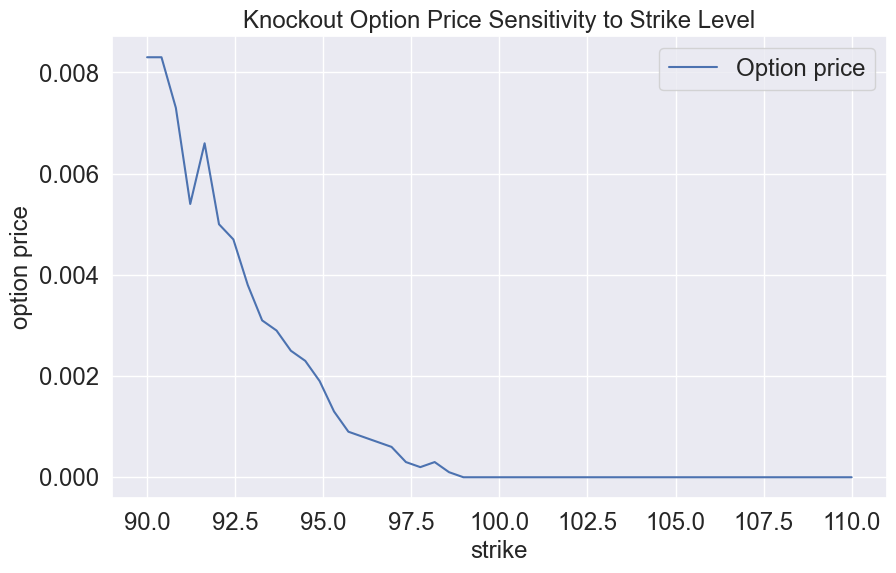

In [13]:
result = run_test(
    "my_custom_tests.SensitivityTest:StrikeRange",
    param_grid={
        "model_type": ['SV'],
        "N": [N],
        "M": [M],
        "strike": list(np.linspace(strike_range[0], strike_range[1], 50)),
        "barrier": [barrier_range[0]],
        "S0": [S0],
        "T": [T],
        "r": [r],
        "sigma": [0.2],
        "v0": [0.2],
        "kappa": [2],
        "theta": [0.2],
        "xi": [0.1],
        "rho": [-0.5],
    },
)
result.log()
plot_results(
    pd.DataFrame(result.metric.summary.results[0].data),
    params={
        "x": "strike",
        "y":"value",
        "label":"Option price",
        "xlabel":"strike",
        "ylabel":"option price",
        "title":"Knockout Option Price Sensitivity to Strike Level",
    }
)

##### Barrier Sensitivity Test

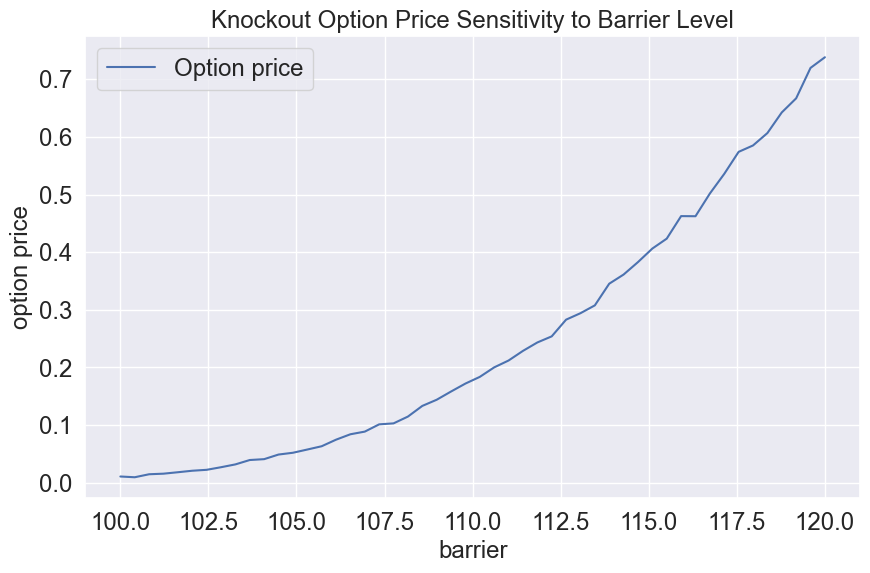

In [14]:
result = run_test(
    "my_custom_tests.SensitivityTest:BarrierRange",
    param_grid={
        "model_type": ['SV'],
        "N": [N],
        "M": [M],
        "strike": [strike_range[0]],
        "barrier": list(np.linspace(barrier_range[0], barrier_range[1], 50)),
        "S0": [S0],
        "T": [T],
        "r": [r],
        "sigma": [0.2],
        "v0": [0.2],
        "kappa": [2],
        "theta": [0.2],
        "xi": [0.1],
        "rho": [-0.5],
    },
)
result.log()
plot_results(
    pd.DataFrame(result.metric.summary.results[0].data),
    params={
        "x": "barrier",
        "y":"value",
        "label":"Option price",
        "xlabel":"barrier",
        "ylabel":"option price",
        "title":"Knockout Option Price Sensitivity to Barrier Level",
    }
)

<a id='toc7_3'></a>
#### Stress Testing

Stress Sigma Test

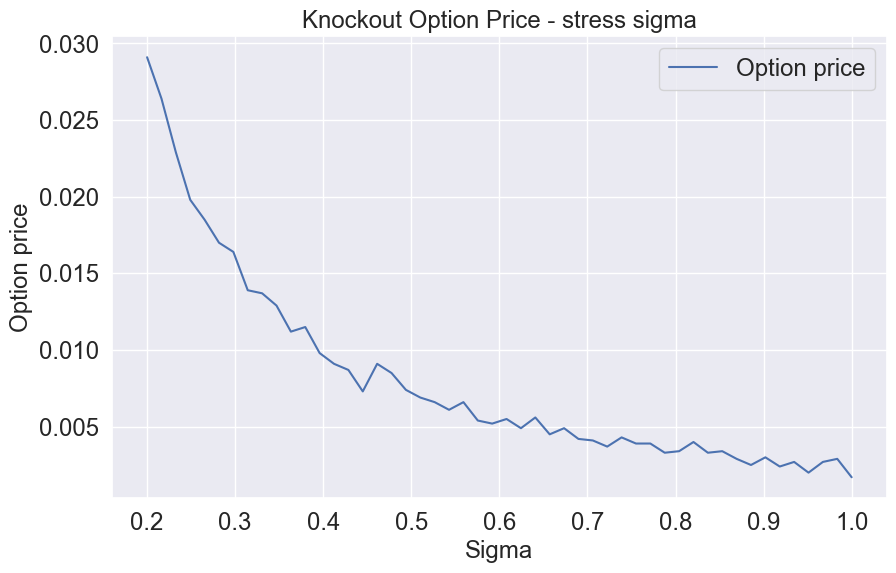

In [15]:
# Stochastic Volatility


true_v0 = 0.2
true_kappa = 2.0
true_theta = 0.2
true_xi = 0.1
true_rho = -0.5

result = run_test(
    "my_custom_tests.SensitivityTest:StressSigma",
    param_grid={
        "model_type": ['BS'],
        "N": [N],
        "M": [M],
        "strike": [strike_range[0]],
        "barrier": [barrier_range[0]],
        "S0": [S0],
        "T": [T],
        "r": [r],
        "sigma": list(np.linspace(0.2, 1.0, 50)),
        "v0": [0.2],
        "kappa": [2],
        "theta": [0.2],
        "xi": [0.1],
        "rho": [-0.5],
    },
)
result.log()
plot_results(
    pd.DataFrame(result.metric.summary.results[0].data),
    params={
        "x": "sigma",
        "y":"value",
        "label":"Option price",
        "xlabel":"Sigma",
        "ylabel":"Option price",
        "title":"Knockout Option Price - stress sigma",
    }
)

Stress kappa 

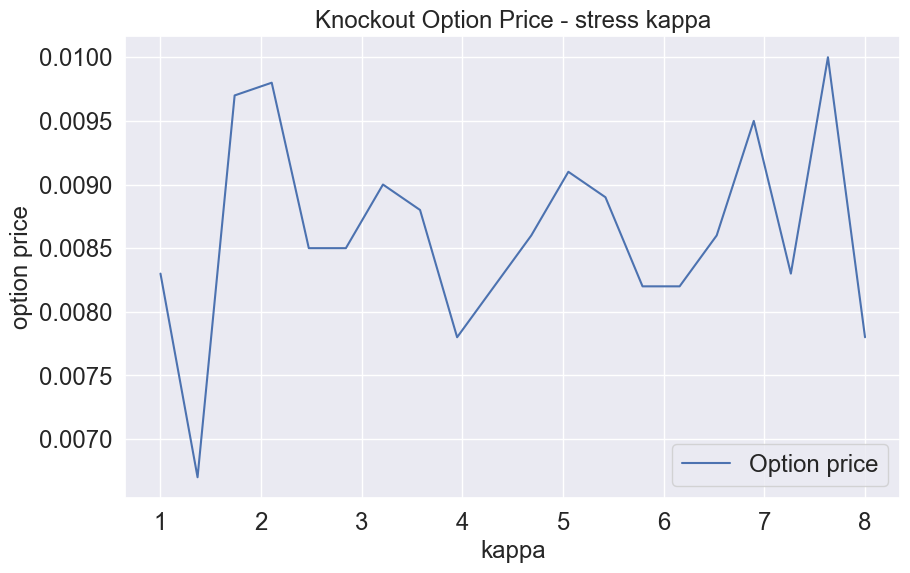

In [16]:
# Stochastic Volatility
true_v0 = 0.2
true_kappa = 2.0
true_theta = 0.2
true_xi = 0.1
true_rho = -0.5
result = run_test(
    "my_custom_tests.SensitivityTest:StressKappa",
    param_grid={
        "model_type": ['SV'],
        "N": [N],
        "M": [M],
        "strike": [strike_range[0]],
        "barrier": [barrier_range[0]],
        "S0": [S0],
        "T": [T],
        "r": [r],
        "sigma":  [0.2],
        "v0": [0.2],
        "kappa": list(np.linspace(1, 8, 20)),
        "theta": [0.2],
        "xi": [0.1],
        "rho": [-0.5],
    },
)
result.log()
plot_results(
    pd.DataFrame(result.metric.summary.results[0].data),
    params={
        "x": "kappa",
        "y":"value",
        "label":"Option price",
        "xlabel":"kappa",
        "ylabel":"option price",
        "title":"Knockout Option Price - stress kappa",
    }
)

Stress theta 

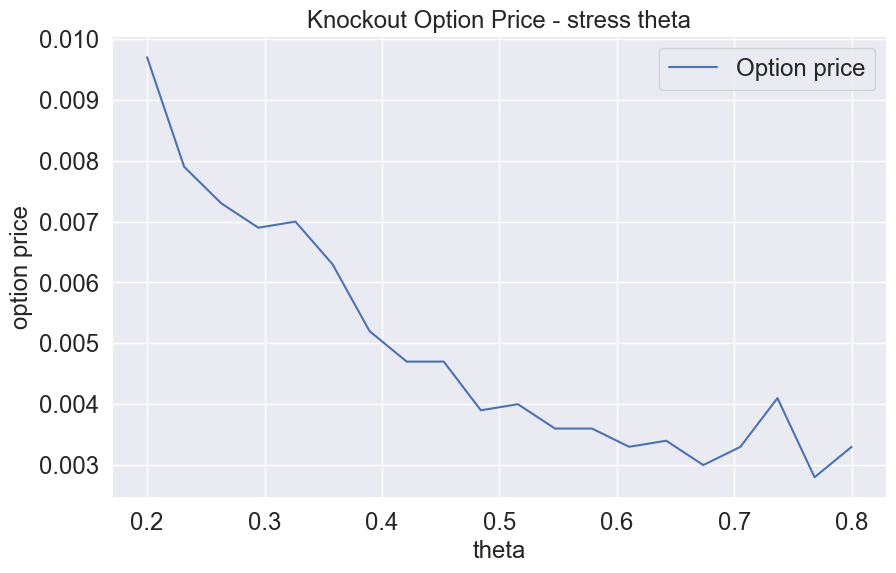

In [17]:
# Stochastic Volatility
true_v0 = 0.2
true_kappa = 2.0
true_theta = 0.2
true_xi = 0.1
true_rho = -0.5
result = run_test(
    "my_custom_tests.SensitivityTest:StressTheta",
    param_grid={
        "model_type": ['SV'],
        "N": [N],
        "M": [M],
        "strike": [strike_range[0]],
        "barrier": [barrier_range[0]],
        "S0": [S0],
        "T": [T],
        "r": [r],
        "sigma":  [0.2],
        "v0": [0.2],
        "kappa": [2],
        "theta": list(np.linspace(0.2, 0.8, 20)),
        "xi": [0.1],
        "rho": [-0.5],
    },
)
result.log()
plot_results(
    pd.DataFrame(result.metric.summary.results[0].data),
    params={
        "x": "theta",
        "y":"value",
        "label":"Option price",
        "xlabel":"theta",
        "ylabel":"option price",
        "title":"Knockout Option Price - stress theta",
    }
)

Stress xi 

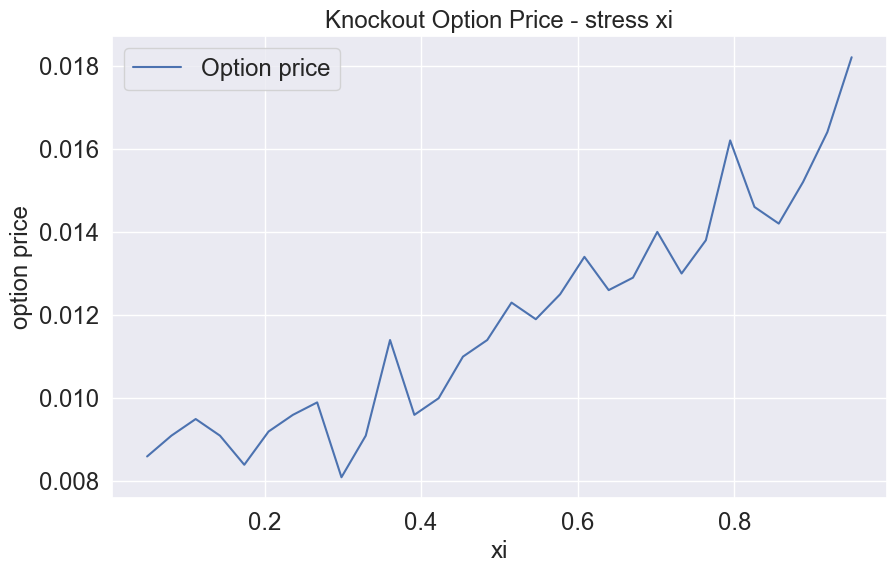

In [18]:
# Stochastic Volatility
true_v0 = 0.2
true_kappa = 2.0
true_theta = 0.2
true_xi = 0.1
true_rho = -0.5
result = run_test(
    "my_custom_tests.SensitivityTest:StressXi",
    param_grid={
        "model_type": ['SV'],
        "N": [N],
        "M": [M],
        "strike": [strike_range[0]],
        "barrier": [barrier_range[0]],
        "S0": [S0],
        "T": [T],
        "r": [r],
        "sigma":  [0.2],
        "v0": [0.2],
        "kappa": [2],
        "theta": [0.2],
        "xi": list(np.linspace(0.05, 0.95, 30)),
        "rho": [-0.5],
    },
)
result.log()
plot_results(
    pd.DataFrame(result.metric.summary.results[0].data),
    params={
        "x": "xi",
        "y":"value",
        "label":"Option price",
        "xlabel":"xi",
        "ylabel":"option price",
        "title":"Knockout Option Price - stress xi",
    }
)

Stress rho 

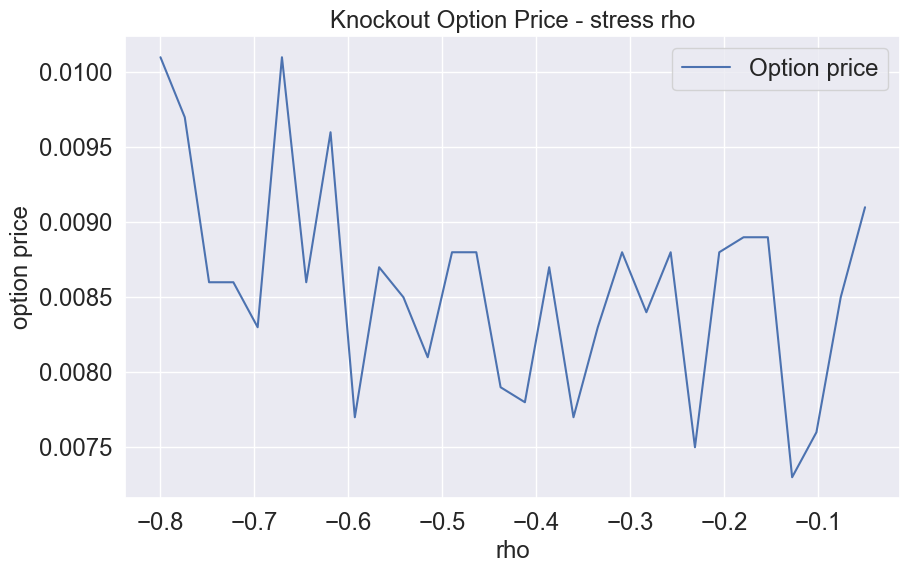

In [19]:
# Stochastic Volatility
true_v0 = 0.2
true_kappa = 2.0
true_theta = 0.2
true_xi = 0.1
true_rho = -0.5
result = run_test(
    "my_custom_tests.SensitivityTest:StressRho",
    param_grid={
        "model_type": ['SV'],
        "N": [N],
        "M": [M],
        "strike": [strike_range[0]],
        "barrier": [barrier_range[0]],
        "S0": [S0],
        "T": [T],
        "r": [r],
        "sigma":  [0.2],
        "v0": [0.2],
        "kappa": [2],
        "theta": [0.2],
        "xi": [0.1],
        "rho": list(np.linspace(-0.05, -0.8, 30)),
    },
)
result.log()
plot_results(
    pd.DataFrame(result.metric.summary.results[0].data),
    params={
        "x": "rho",
        "y":"value",
        "label":"Option price",
        "xlabel":"rho",
        "ylabel":"option price",
        "title":"Knockout Option Price - stress rho",
    }
)

<a id='toc8_'></a>

## Next steps

You can look at the results of this test suite right in the notebook where you ran the code, as you would expect. But there is a better way — use the ValidMind platform to work with your model documentation.

<a id='toc8_1_'></a>

### Work with your model documentation

1. From the **Model Inventory** in the ValidMind Platform UI, go to the model you registered earlier. ([Need more help?](https://docs.validmind.ai/guide/model-inventory/working-with-model-inventory.html))

2. Click and expand the **Model Development** section.

What you see is the full draft of your model documentation in a more easily consumable version. From here, you can make qualitative edits to model documentation, view guidelines, collaborate with validators, and submit your model documentation for approval when it's ready. [Learn more ...](https://docs.validmind.ai/guide/model-documentation/working-with-model-documentation.html)

<a id='toc8_2_'></a>

### Discover more learning resources

We offer many interactive notebooks to help you document models:

- [Run tests & test suites](https://docs.validmind.ai/developer/model-testing/testing-overview.html)
- [Code samples](https://docs.validmind.ai/developer/samples-jupyter-notebooks.html)

Or, visit our [documentation](https://docs.validmind.ai/) to learn more about ValidMind.